1. drinks.csv 파일 로드 
2. 결측치 확인
3. continent 컬럼에 결측치 존재 -> 결측치를 'OT'로 대체
4. continent 별 spirit_servings 컬럼의 평균, 최소, 최대, 합계를 출력
5. 4개의 값들을 그래프로 표시 ( 바형 그래프 )
6. total_liters_of_pure_alcohol 컬럼의 평균보다 높은 continent가 어디인지 출력

In [1]:
## 파일 로드 
import pandas as pd

In [26]:
drinks = pd.read_csv("../csv/drinks.csv")

In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [4]:
drinks_copy = drinks

In [5]:
## 결측치가 존재하는지 확인
drinks_copy.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [8]:
## continent 컬럼의 결측치의 값을 'OT' 로 대체
drinks_copy["continent"] = drinks_copy["continent"].fillna('OT')

In [13]:
## continent 별 spirit_servings컬럼의 평균, 최소, 최대, 합계 
group_data = drinks_copy.groupby("continent").agg(["mean", "min", "max", "sum"])["spirit_servings"]

In [12]:
## 시각화
import matplotlib.pyplot as plt

In [16]:
group_data.index

Index(['AF', 'AS', 'EU', 'OC', 'OT', 'SA'], dtype='object', name='continent')

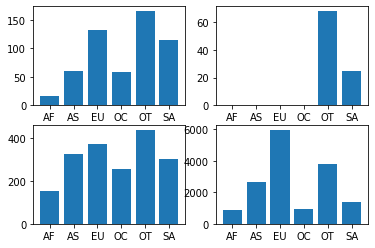

In [18]:
## 4개의 그래프 subplot 이용하여 출력
## 바형 그래프
x = group_data.index

plt.subplot(2, 2, 1)
plt.bar(x, group_data["mean"])
plt.subplot(2, 2, 2)
plt.bar(x, group_data["min"])
plt.subplot(2, 2, 3)
plt.bar(x, group_data["max"])
plt.subplot(2, 2, 4)
plt.bar(x, group_data["sum"])
plt.show()

In [ ]:
## 전체 술 소비량의 평균보다 높은 continent가 어디인가?

## continent 별 전체 술소비량 평균을 구하는 데이터프레임 생성
group_data_2 = drinks_copy.groupby("continent").mean()\
    ["total_litres_of_pure_alcohol"]
group_data_2

In [22]:
## 전체 술 소비량의 평균 
total_mean = drinks_copy.mean()["total_litres_of_pure_alcohol"]

In [23]:
## 그룹화한 데이터와 전체 술소비량의 평균 값을 가지고 비교
group_data_2[group_data_2 >= total_mean]

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64